In [29]:
import sys
sys.path.append('../') # Change path
from Functions import * # Import Gradient_function
import copy

Y = [[1, 1, 2],
     [-1, 1, 3],
     [-1, 1, 4],
     [1, 2, 3],
     [1, 2, 4],
     [1, 3, 4]]


mu = np.zeros(2) # mean (mu) as a zero vector
cov_matrix = np.array([[1.0, 0.5], [0.5, 2.0]]) # covariance matrix
num_samples = 4  # Number of samples you want to generate

point_number = 1 # Point you want to test
point_index = 0 # Index you want to test

points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)} # Generate points

In [30]:
# Function af x
sum = Loss_function(points,Y)
print(sum)

# Function af x+epsilon
point_e = copy.deepcopy(points)
point_e[point_number][point_index] += 0.001 # Update the point[1][0]
sum_e = Loss_function(point_e,Y)
print(sum_e)

# Gradient af x
gradient = Gradient_function(point_number,point_index,Y,points)
print(gradient)

# Error
(sum_e-sum)/0.001-(gradient)

-12.132829374880586
-12.133304782462908
-0.4754383933746604


3.0811053208290584e-05

In [31]:
hist = np.zeros(1000) # Number of test
for n in range(1000):
    points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)} # Generate points from a normal distribution
    
    sum = function(points) # Function af x

    point_e = copy.deepcopy(points)
    point_e[point_number][point_index] += 0.001 # Update the point[1][0]
    sum_e = function(point_e) # Function af x+epsilon
    
    gradient = grad(point_number,point_index,points) # Gradient af x
            
    hist[n] = (sum_e-sum)/0.001-(gradient) # Error

(array([ 2.,  1.,  0.,  3.,  1.,  5.,  5.,  2.,  8.,  7.,  4., 18., 19.,
        17., 31., 35., 56., 73., 45., 50., 72., 88., 51., 55., 80., 80.,
        35., 42., 44., 71.]),
 array([-0.0049399 , -0.00470976, -0.00447963, -0.00424949, -0.00401935,
        -0.00378921, -0.00355907, -0.00332893, -0.00309879, -0.00286865,
        -0.00263851, -0.00240837, -0.00217823, -0.00194809, -0.00171796,
        -0.00148782, -0.00125768, -0.00102754, -0.0007974 , -0.00056726,
        -0.00033712, -0.00010698,  0.00012316,  0.0003533 ,  0.00058344,
         0.00081358,  0.00104372,  0.00127385,  0.00150399,  0.00173413,
         0.00196427]),
 <BarContainer object of 30 artists>)

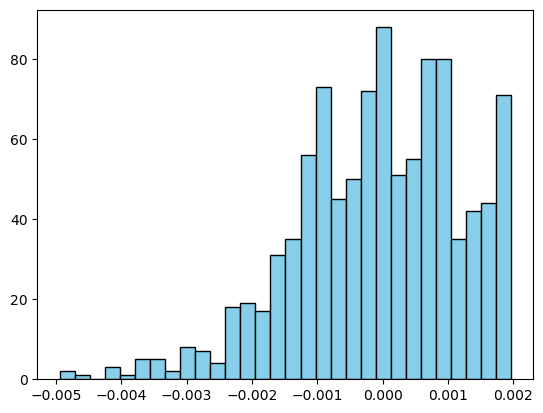

In [32]:
import matplotlib.pyplot as plt
plt.hist(hist, bins = 30, color='skyblue', edgecolor='black')